In [1]:
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import seaborn as sns


In [2]:
sp500_companies = pd.read_csv('constituents-financials_csv.csv')

In [3]:
print(sp500_companies.head())

  Symbol                 Name                  Sector   Price  Price/Earnings  \
0    MMM           3M Company             Industrials  222.89           24.31   
1    AOS      A.O. Smith Corp             Industrials   60.24           27.76   
2    ABT  Abbott Laboratories             Health Care   56.27           22.51   
3   ABBV          AbbVie Inc.             Health Care  108.48           19.41   
4    ACN        Accenture plc  Information Technology  150.51           25.47   

   Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
0        2.332862            7.92       259.77       175.490  1.387210e+11   
1        1.147959            1.70        68.39        48.925  1.078342e+10   
2        1.908982            0.26        64.60        42.280  1.021210e+11   
3        2.499560            3.29       125.86        60.050  1.813860e+11   
4        1.714470            5.44       162.60       114.820  9.876586e+10   

         EBITDA  Price/Sales  Price/Book  \


In [4]:
sp_marketcap = sp500_companies.loc[:,['Name','Market Cap']]
print(sp_marketcap.head())

                  Name    Market Cap
0           3M Company  1.387210e+11
1      A.O. Smith Corp  1.078342e+10
2  Abbott Laboratories  1.021210e+11
3          AbbVie Inc.  1.813860e+11
4        Accenture plc  9.876586e+10


In [5]:
type(sp_marketcap['Market Cap'])

pandas.core.series.Series

In [6]:
 marketcapnumpy = np.array(sp_marketcap['Market Cap'])
print(marketcapnumpy)

[1.38721000e+11 1.07834199e+10 1.02121000e+11 1.81386000e+11
 9.87658556e+10 5.25186681e+10 6.24237770e+09 9.45502143e+10
 8.12361187e+09 1.11916638e+10 6.92085121e+09 5.91970164e+10
 1.04421744e+10 3.34229480e+10 2.19846069e+10 3.46383871e+10
 1.09069041e+10 7.90317373e+09 1.17821513e+10 1.20433744e+10
 2.61724398e+10 1.87880414e+10 7.59960949e+09 5.66688339e+10
 1.36326086e+10 8.67016350e+09 3.47594689e+10 7.33824000e+11
 7.28536000e+11 1.26985000e+11 6.85873000e+11 1.29057449e+10
 2.45948524e+10 3.17019165e+10 8.04109900e+10 5.43600732e+10
 5.92138926e+10 1.39061462e+10 2.34721260e+10 2.05877041e+10
 1.71396519e+10 1.28133000e+11 2.69553354e+10 3.21290917e+10
 3.18115789e+10 1.56964497e+10 1.31559191e+10 6.12219786e+10
 3.51231234e+10 1.50662810e+10 6.15688414e+09 8.09508000e+11
 5.12964815e+10 2.49065303e+10 2.35947707e+10 1.21233000e+10
 1.19684883e+10 4.65399359e+09 2.26713000e+11 2.43482945e+10
 5.03377022e+10 1.99220214e+10 2.18565474e+10 1.01048143e+10
 3.29957129e+10 1.376768

In [7]:
np.mean(marketcapnumpy)

49239434807.05347

In [8]:
np.sum(marketcapnumpy)

24865914577562.0

In [9]:
np.transpose(marketcapnumpy)

array([1.38721000e+11, 1.07834199e+10, 1.02121000e+11, 1.81386000e+11,
       9.87658556e+10, 5.25186681e+10, 6.24237770e+09, 9.45502143e+10,
       8.12361187e+09, 1.11916638e+10, 6.92085121e+09, 5.91970164e+10,
       1.04421744e+10, 3.34229480e+10, 2.19846069e+10, 3.46383871e+10,
       1.09069041e+10, 7.90317373e+09, 1.17821513e+10, 1.20433744e+10,
       2.61724398e+10, 1.87880414e+10, 7.59960949e+09, 5.66688339e+10,
       1.36326086e+10, 8.67016350e+09, 3.47594689e+10, 7.33824000e+11,
       7.28536000e+11, 1.26985000e+11, 6.85873000e+11, 1.29057449e+10,
       2.45948524e+10, 3.17019165e+10, 8.04109900e+10, 5.43600732e+10,
       5.92138926e+10, 1.39061462e+10, 2.34721260e+10, 2.05877041e+10,
       1.71396519e+10, 1.28133000e+11, 2.69553354e+10, 3.21290917e+10,
       3.18115789e+10, 1.56964497e+10, 1.31559191e+10, 6.12219786e+10,
       3.51231234e+10, 1.50662810e+10, 6.15688414e+09, 8.09508000e+11,
       5.12964815e+10, 2.49065303e+10, 2.35947707e+10, 1.21233000e+10,
      

In [10]:
np.ptp(marketcapnumpy)

806881897879.0

In [11]:
806881897879.0/10

80688189787.9

(array([436.,  38.,  17.,   5.,   3.,   0.,   1.,   0.,   3.,   2.]),
 array([2.62610212e+09, 8.33142919e+10, 1.64002482e+11, 2.44690671e+11,
        3.25378861e+11, 4.06067051e+11, 4.86755241e+11, 5.67443431e+11,
        6.48131620e+11, 7.28819810e+11, 8.09508000e+11]),
 <BarContainer object of 10 artists>)

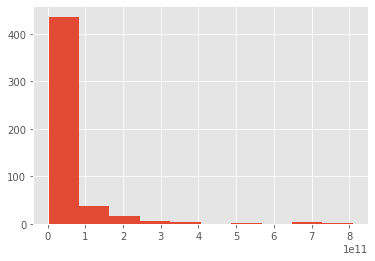

In [12]:
plt.hist(marketcapnumpy, bins=10 )


In [13]:
#A little complicated and dificult to work with so I will Divide by a billion to simplify

In [15]:
marketcapsbln = marketcapnumpy/1000000000


In [16]:
#double checking 
np.ptp(marketcapsbln)


806.881897879

NameError: name 'xaxis' is not defined

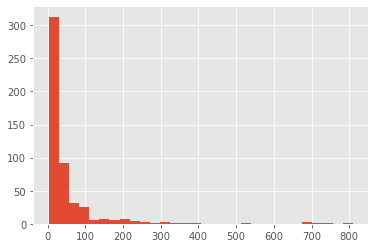

In [17]:
#Make a new histogram
plt.hist(marketcapsbln, bins=30 )

xaxis(title)


In [18]:
#Sort the dataframe to find the top ten and bottom ten by market cap

In [20]:
Marketcap_smallest = sp_marketcap.sort_values('Market Cap', ascending = True)
print(Marketcap_smallest.head(10))

                      Name    Market Cap
104      Chesapeake Energy  2.626102e+09
412        Signet Jewelers  3.034276e+09
353    Patterson Companies  3.209792e+09
386  Range Resources Corp.  3.255588e+09
324                Navient  3.692691e+09
170    Envision Healthcare  4.212729e+09
57            Assurant Inc  4.653994e+09
133              CSRA Inc.  5.134501e+09
405             SCANA Corp  5.229449e+09
384   Quanta Services Inc.  5.330131e+09


In [21]:
Marketcap_largest = sp_marketcap.sort_values('Market Cap', ascending = False)

In [22]:
print(Marketcap_largest.head(15))

                     Name    Market Cap
51             Apple Inc.  8.095080e+11
27   Alphabet Inc Class A  7.338240e+11
28   Alphabet Inc Class C  7.285360e+11
311       Microsoft Corp.  6.899780e+11
30         Amazon.com Inc  6.858730e+11
187        Facebook, Inc.  5.234230e+11
263  JPMorgan Chase & Co.  3.866140e+11
261     Johnson & Johnson  3.530620e+11
185     Exxon Mobil Corp.  3.261490e+11
66   Bank of America Corp  3.214780e+11
480       Wal-Mart Stores  3.046810e+11
485           Wells Fargo  2.814640e+11
477             Visa Inc.  2.700390e+11
70     Berkshire Hathaway  2.614010e+11
58               AT&T Inc  2.267130e+11


In [23]:
#create a scatterplot of companies to visualise this

In [24]:
#create a list of companies to analyse

In [30]:
largest_companies = Marketcap_largest[0:15]
print(largest_companies)

                     Name    Market Cap
51             Apple Inc.  8.095080e+11
27   Alphabet Inc Class A  7.338240e+11
28   Alphabet Inc Class C  7.285360e+11
311       Microsoft Corp.  6.899780e+11
30         Amazon.com Inc  6.858730e+11
187        Facebook, Inc.  5.234230e+11
263  JPMorgan Chase & Co.  3.866140e+11
261     Johnson & Johnson  3.530620e+11
185     Exxon Mobil Corp.  3.261490e+11
66   Bank of America Corp  3.214780e+11
480       Wal-Mart Stores  3.046810e+11
485           Wells Fargo  2.814640e+11
477             Visa Inc.  2.700390e+11
70     Berkshire Hathaway  2.614010e+11
58               AT&T Inc  2.267130e+11


In [32]:
listoflargest = largest_companies['Name']
print(listoflargest)

51               Apple Inc.
27     Alphabet Inc Class A
28     Alphabet Inc Class C
311         Microsoft Corp.
30           Amazon.com Inc
187          Facebook, Inc.
263    JPMorgan Chase & Co.
261       Johnson & Johnson
185       Exxon Mobil Corp.
66     Bank of America Corp
480         Wal-Mart Stores
485             Wells Fargo
477               Visa Inc.
70       Berkshire Hathaway
58                 AT&T Inc
Name: Name, dtype: object
